In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
data = pd.read_csv("공공보건의료기관현황.csv", index_col = 0, encoding = 'CP949', engine = 'python')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [3]:
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [4]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [5]:
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [6]:
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [10]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [11]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [12]:
addr.iloc[47]

시도    경산시
군구    경안로
Name: 47, dtype: object

In [13]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [14]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [15]:
addr.iloc[210]

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [16]:
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도',
               '충북':'충청북도','서울시':'서울특별시','부산특별시':'부산광역시',
               '대전시':'대전광역시','충남':'충청남도','전남':'전라남도','전북':'전라북도'}

In [17]:
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [18]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '경산시', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [19]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경안로', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '경산시', '양평군', '수성구', '달성군',
       '연수구', '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시',
       '고흥군', '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구',
       '양천구', '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군',
       '무안군', '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군',
       '정읍시', '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시',
       '서산

In [20]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [21]:
addr.iloc[75] = ['제주특별자치도', '제주시']

In [22]:
addr[addr['군구'] == '아란13길']

,시도,군구


In [23]:
addr[addr['군구'] == '제주시']

,시도,군구
75,제주특별자치도,제주시
205,제주특별자치도,제주시
206,제주특별자치도,제주시


In [24]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경안로', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '경산시', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군',
     

In [25]:
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)

In [26]:
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [27]:
addr['count'] = 0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [28]:
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [29]:
addr_group = addr_group.set_index("시도군구")
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [30]:
population = pd.read_excel('행정구역_시군구_별__성별_인구수_2.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51408155,25617485,25790670
1,서울특별시,소계,9422710,4563512,4859198
2,서울특별시,종로구,140891,68079,72812
3,서울특별시,중구,121250,58806,62444
4,서울특별시,용산구,217611,104580,113031


In [31]:
population = population.rename(columns = {'행정구역(시군구)별(1)': '시도', '행정구역(시군구)별(2)': '군구'})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51408155,25617485,25790670
1,서울특별시,소계,9422710,4563512,4859198
2,서울특별시,종로구,140891,68079,72812
3,서울특별시,중구,121250,58806,62444
4,서울특별시,용산구,217611,104580,113031


In [32]:
for element in range(0, len(population)):
    population['군구'][element] = population['군구'][element].strip()

In [33]:
population['시도군구'] = population.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51408155,25617485,25790670,전국 소계
1,서울특별시,소계,9422710,4563512,4859198,서울특별시 소계
2,서울특별시,종로구,140891,68079,72812,서울특별시 종로구
3,서울특별시,중구,121250,58806,62444,서울특별시 중구
4,서울특별시,용산구,217611,104580,113031,서울특별시 용산구


In [34]:
population = population[population.군구 != '소계']

In [35]:
population = population.set_index("시도군구")
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,140891,68079,72812
서울특별시 중구,서울특별시,중구,121250,58806,62444
서울특별시 용산구,서울특별시,용산구,217611,104580,113031
서울특별시 성동구,서울특별시,성동구,279980,136059,143921
서울특별시 광진구,서울특별시,광진구,336558,162071,174487


In [36]:
addr_population_merge = pd.merge(addr_group,population, how = 'inner', left_index = True, right_index = True)
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210630,104403,106227
강원도 동해시,강원도,동해시,1,강원도,동해시,89150,45303,43847
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63444,32193,31251
강원도 속초시,강원도,속초시,1,강원도,속초시,82499,40867,41632
강원도 양구군,강원도,양구군,1,강원도,양구군,21348,11218,10130


In [37]:
local_MC_Population = addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_MC_Population.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,210630
강원도 동해시,강원도,동해시,1,89150
강원도 삼척시,강원도,삼척시,1,63444
강원도 속초시,강원도,속초시,1,82499
강원도 양구군,강원도,양구군,1,21348


In [38]:
local_MC_Population = local_MC_Population.rename(columns = {'시도_x': '시도', '군구_x': '군구', '총인구수 (명)': '인구수'})
MC_count = local_MC_Population['count']
local_MC_Population['MC_ratio'] = MC_count.div(local_MC_Population['인구수'], axis = 0)*100000
local_MC_Population.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,210630,1.899065
강원도 동해시,강원도,동해시,1,89150,1.121705
강원도 삼척시,강원도,삼척시,1,63444,1.576193
강원도 속초시,강원도,속초시,1,82499,1.212136
강원도 양구군,강원도,양구군,1,21348,4.684280


In [39]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

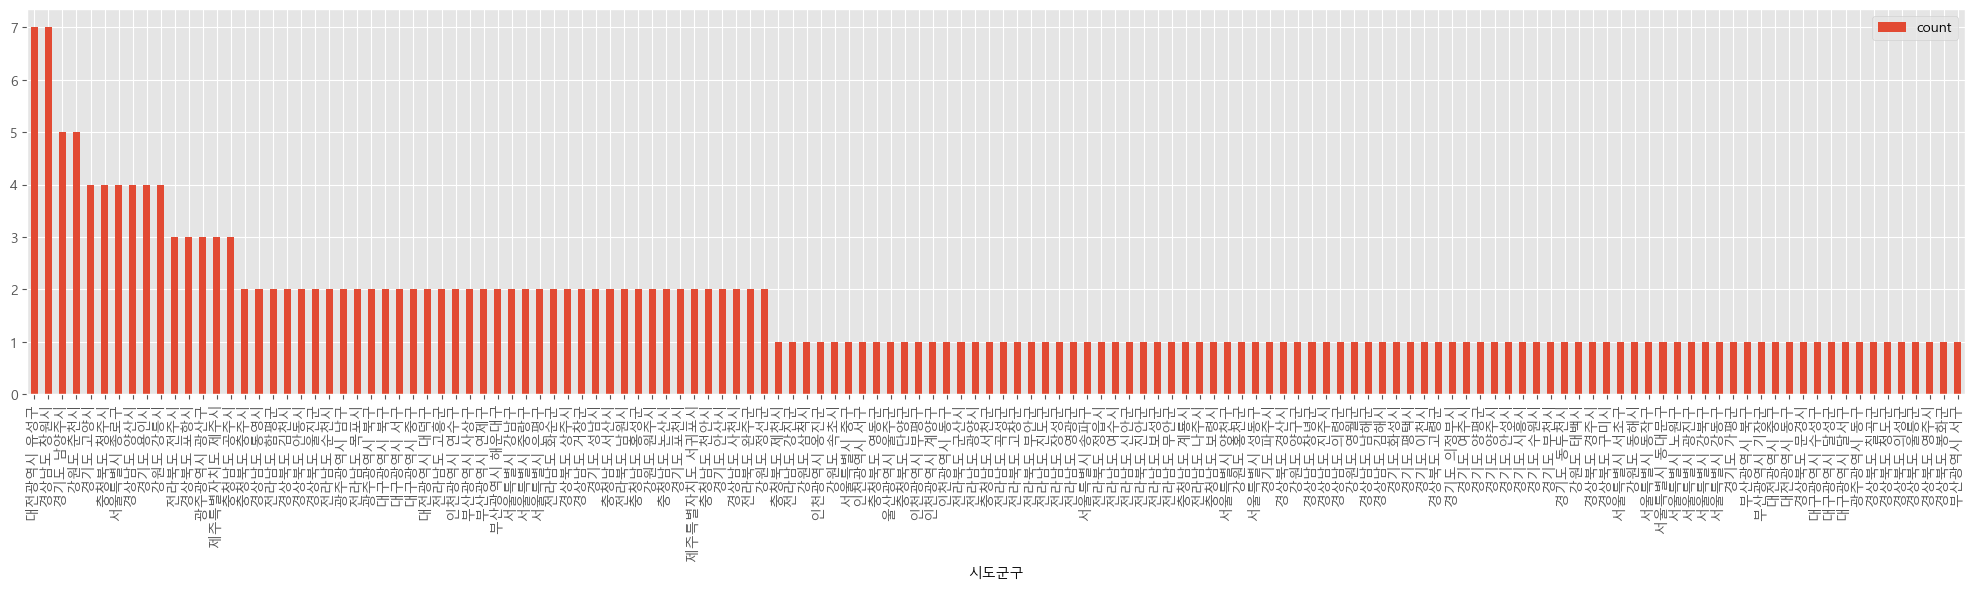

In [40]:
MC_ratio = local_MC_Population[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
plt.rcParams["figure.figsize"] = (25, 5)
MC_ratio.plot(kind = 'bar', rot = 90)
plt.show()